In [ ]:
pip install clodsa


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.2/276.2 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 69.2 MB/s eta 0:00:00
  Created wheel for clodsa: filename=clodsa-1.2.48-py2.py3-none-any.whl size=74308 sha256=17ac2ed1e45d5ce8d26cce3425ea2f60f56084a200a472bcde09dbdb7bdbca9e
  Stored in directory: /root/.cache/pip/wheels/74/81/2d/ec14861c74e3d4d4be179aa6061540934f6cbf7da6fcf80396
  Created wheel for commentjson: filename=commentjson-0.9.0-py3-none-any.whl size=12077 sha256=cadcac6dfc583da57a5f5173832134a283e15e41b7359b0f24cc8713719c7ad3
  Stored in directory: /root/.cache/pip/wheels/f2/cb/58/77f1f0b3f5fa6eb3335cb0cb73de4d4bef93489dc3a3373ae8
  Created wheel for lark-parser: filename=lark_parser-0.7.8-py2.py3-none-any.whl size=62511 sha256=854e47bcfc01f170588e31d5e23c4780007890dc3c3439943444657ba3624443
  Stored in directory: /ro

In [ ]:
from matplotlib import pyplot as plt
from clodsa.augmentors.augmentorFactory import createAugmentor
from clodsa.transformers.transformerFactory import transformerGenerator
from clodsa.techniques.techniqueFactory import createTechnique
import xml.etree.ElementTree as ET
import cv2
%matplotlib inline

In [ ]:
PROBLEM = "detection"
ANNOTATION_MODE = "yolo"
INPUT_PATH = "/content/sam"
GENERATION_MODE = "linear"
OUTPUT_MODE = "yolo"
OUTPUT_PATH= "augmented_images_yolo"

In [ ]:
augmentor = createAugmentor(PROBLEM,ANNOTATION_MODE,OUTPUT_MODE,GENERATION_MODE,INPUT_PATH,{"outputPath":OUTPUT_PATH})

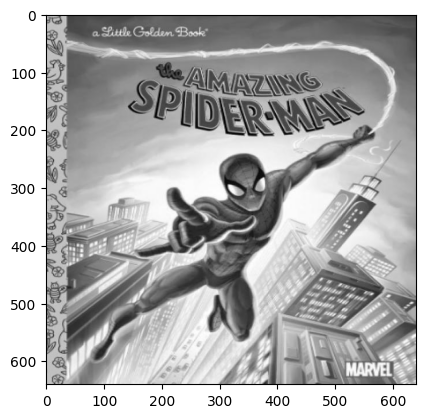

In [ ]:
img = cv2.imread("/content/sam/image_02_png.rf.893058f105f1bff8046de8ec35fb69e0.jpg")
# changing to the BGR format of OpenCV to RGB format for matplotlib
plt.imshow(img[:,:,::-1])

In [ ]:
def boxesFromYOLO(imagePath,labelPath):
    image = cv2.imread(imagePath)
    (hI, wI) = image.shape[:2]
    lines = [line.rstrip('\n') for line in open(labelPath)]
    #if(len(objects)<1):
    #    raise Exception("The xml should contain at least one object")
    boxes = []
    if lines != ['']:
        for line in lines:
            components = line.split(" ")
            category = components[0]
            x  = int(float(components[1])*wI - float(components[3])*wI/2)
            y = int(float(components[2])*hI - float(components[4])*hI/2)
            h = int(float(components[4])*hI)
            w = int(float(components[3])*wI)
            boxes.append((category, (x, y, w, h)))
    return (image,boxes)

In [ ]:
categoriesColors = {11: (255,0,0),14:(0,0,255)}

def showBoxes(image,boxes):
    cloneImg = image.copy()
    for box in boxes:
        if(len(box)==2):
            (category, (x, y, w, h))=box
        else:
            (category, (x, y, w, h),_)=box
        if int(category) in categoriesColors.keys():
            cv2.rectangle(cloneImg,(x,y),(x+w,y+h),categoriesColors[int(category)],5)
        else:
            cv2.rectangle(cloneImg,(x,y),(x+w,y+h),(0,255,0),2)
    plt.imshow(cloneImg[:,:,::-1])


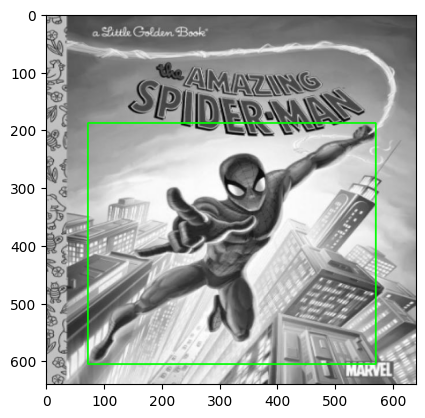

In [ ]:
img,boxes = boxesFromYOLO("/content/sam/image_02_png.rf.893058f105f1bff8046de8ec35fb69e0.jpg","/content/sam/image_02_png.rf.893058f105f1bff8046de8ec35fb69e0.txt")
showBoxes(img,boxes)

In [ ]:
transformer = transformerGenerator(PROBLEM)


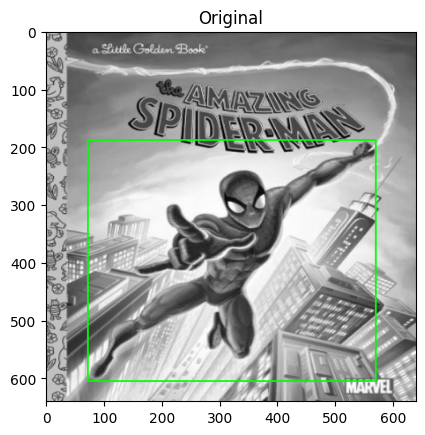

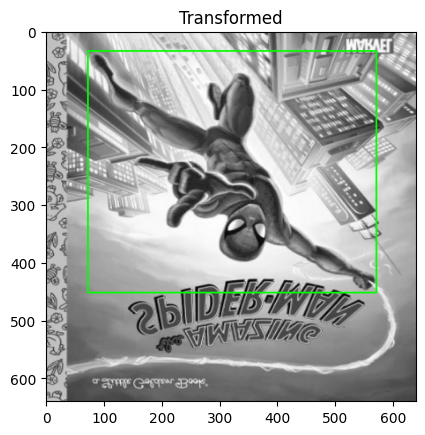

In [ ]:
vFlip = createTechnique("flip",{"flip":0})
augmentor.addTransformer(transformer(vFlip))
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
vFlipGenerator = transformer(vFlip)
vFlipImg,vFlipBoxes = vFlipGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(vFlipImg,vFlipBoxes)

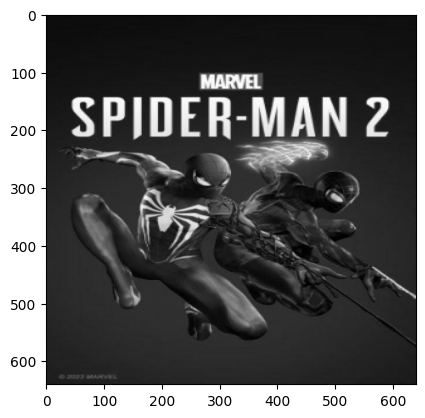

In [ ]:
img = cv2.imread("/content/sam/image_06_png.rf.96b21a5338b6654a7b02e5151ddbd6d9.jpg")
# changing to the BGR format of OpenCV to RGB format for matplotlib
plt.imshow(img[:,:,::-1])

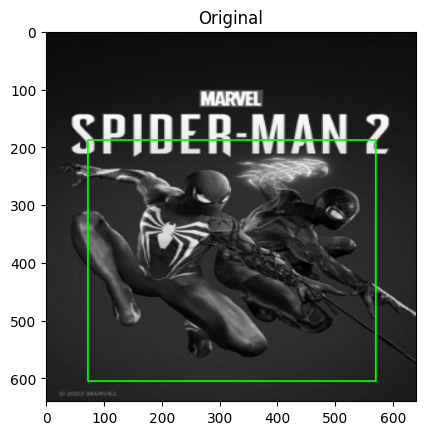

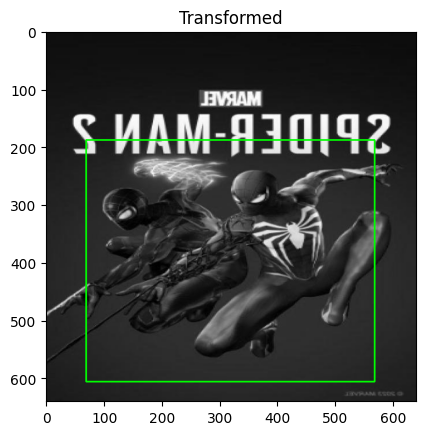

In [ ]:
hFlip = createTechnique("flip",{"flip":1})
augmentor.addTransformer(transformer(hFlip))
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
hFlipGenerator = transformer(hFlip)
hFlipImg,hFlipBoxes = hFlipGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(hFlipImg,hFlipBoxes)

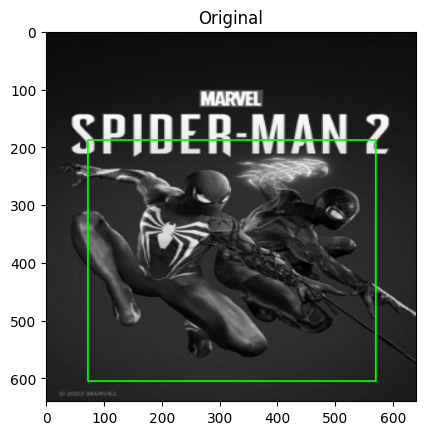

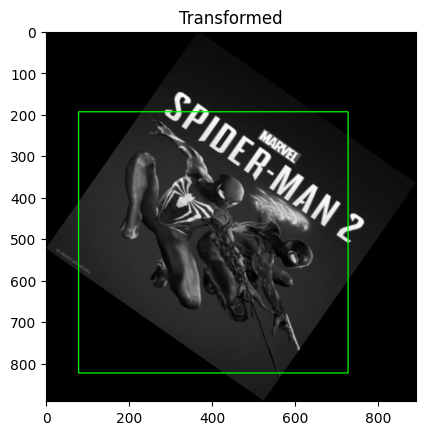

In [ ]:
rotate = createTechnique("rotate", {"angle" : 35})
augmentor.addTransformer(transformer(rotate))
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
rotateGenerator = transformer(rotate)
rotateImg,rotateBoxes = rotateGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(rotateImg,rotateBoxes)

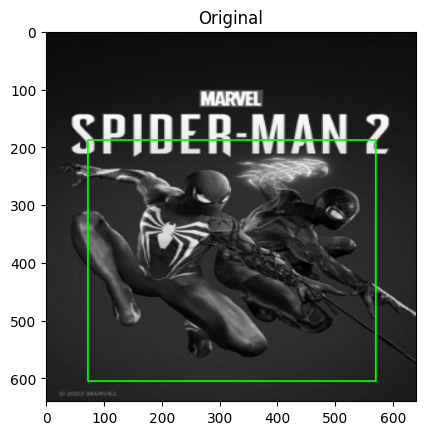

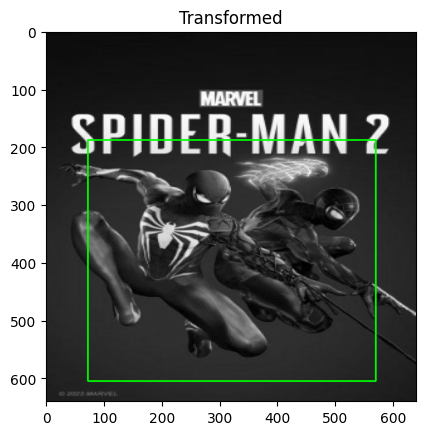

In [ ]:
rotate = createTechnique("raise_hue", {"power" : 0.99})
augmentor.addTransformer(transformer(rotate))
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
rotateGenerator = transformer(rotate)
rotateImg,rotateBoxes = rotateGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(rotateImg,rotateBoxes)

In [ ]:
none = createTechnique("none",{})
augmentor.addTransformer(transformer(none))

In [ ]:
augmentor.applyAugmentation()

In [ ]:
print("Number of images in the folder")
!ls -1 augmented_images_yolo/*.jpg | wc -l
print("Number of annotations in the folder")
!ls -1 augmented_images_yolo/*.txt | wc -l

Number of images in the folder
40
Number of annotations in the folder
40


In [ ]:
!zip -r augmented_images_yolo.zip augmented_images_yolo
from google.colab import files
files.download('augmented_images_yolo.zip')

  adding: augmented_images_yolo/ (stored 0%)
  adding: augmented_images_yolo/0_0_image_02_png.rf.893058f105f1bff8046de8ec35fb69e0.jpg (deflated 6%)
  adding: augmented_images_yolo/6_0_image_20_png.rf.2643c61c8b62aee0c236be6c18346126.txt (deflated 31%)
  adding: augmented_images_yolo/3_4_image_14_png.rf.8393bf5ddf9a72e6153031a77ce14e5f.jpg (deflated 10%)
  adding: augmented_images_yolo/4_2_image_17_png.rf.27ff9164f67e941970388e14a258f6eb.jpg (deflated 5%)
  adding: augmented_images_yolo/4_2_image_17_png.rf.27ff9164f67e941970388e14a258f6eb.txt (deflated 51%)
  adding: augmented_images_yolo/2_0_image_19_png.rf.cee551e1d8a99738686cfe83fe447cbb.jpg (deflated 10%)
  adding: augmented_images_yolo/5_3_image_06_png.rf.96b21a5338b6654a7b02e5151ddbd6d9.jpg (deflated 10%)
  adding: augmented_images_yolo/2_3_image_19_png.rf.cee551e1d8a99738686cfe83fe447cbb.jpg (deflated 10%)
  adding: augmented_images_yolo/7_1_image_10_png.rf.9f39beeb625ebc1cb8fc2d1af22433e6.jpg (deflated 6%)
  adding: augmented_im

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Install required packages
!pip install -q albumentations==1.3.1 opencv-python matplotlib

# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A
import os
from google.colab import files
from zipfile import ZipFile
import io
import PIL.Image

# Upload a ZIP file containing images and YOLO labels
print("Upload a ZIP folder with images and YOLO labels:")
uploaded = files.upload()

# Unzip contents
zip_file = next(iter(uploaded))
with ZipFile(io.BytesIO(uploaded[zip_file]), 'r') as zip_ref:
    zip_ref.extractall("data")

# Create output directory
os.makedirs("augmented", exist_ok=True)

# Define augmentations
transformations = [
    A.HorizontalFlip(p=1),
    A.VerticalFlip(p=1),
    A.RandomBrightnessContrast(p=1),
    A.Rotate(limit=30, p=1),
    A.Blur(blur_limit=3, p=1),
    A.RGBShift(p=1)
]

# Function to draw bounding boxes
def draw_boxes(img, boxes, labels):
    img_draw = img.copy()
    for box, cls in zip(boxes, labels):
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(img_draw, (x1, y1), (x2, y2), (0,255,0), 2)
        cv2.putText(img_draw, str(cls), (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)
    return img_draw

# Process each image in the folder
image_dir = "data"
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith((".jpg", ".jpeg", ".png"))]

for image_file in image_files:
    base_name = os.path.splitext(image_file)[0]
    label_file = f"{base_name}.txt"
    image_path = os.path.join(image_dir, image_file)
    label_path = os.path.join(image_dir, label_file)

    # Skip if label file doesn't exist
    if not os.path.exists(label_path):
        continue

    # Load image
    img = PIL.Image.open(image_path).convert("RGB")
    img_np = np.array(img)
    height, width = img_np.shape[:2]

    # Load YOLO labels
    boxes_yolo = []
    class_ids = []
    with open(label_path, 'r') as f:
        for line in f:
            cls, cx, cy, w, h = map(float, line.strip().split())
            x_min = (cx - w/2) * width
            y_min = (cy - h/2) * height
            x_max = (cx + w/2) * width
            y_max = (cy + h/2) * height
            boxes_yolo.append([x_min, y_min, x_max, y_max])
            class_ids.append(int(cls))

    # Apply each augmentation
    for i, aug in enumerate(transformations, start=1):
        transform = A.Compose([aug], bbox_params=A.BboxParams(format='yolo_voc', label_fields=['class_labels']))
        augmented = transform(image=img_np, bboxes=boxes_yolo, class_labels=class_ids)

        aug_img = augmented['image']
        aug_boxes = augmented['bboxes']
        aug_labels = augmented['class_labels']

        # Convert to YOLO format
        yolo_lines = []
        for box, cls in zip(aug_boxes, aug_labels):
            x_min, y_min, x_max, y_max = box
            cx = (x_min + x_max) / 2 / width
            cy = (y_min + y_max) / 2 / height
            bw = (x_max - x_min) / width
            bh = (y_max - y_min) / height
            yolo_lines.append(f"{cls} {cx:.6f} {cy:.6f} {bw:.6f} {bh:.6f}")

        # Save augmented image and label
        out_img_name = f"{base_name}_aug{i}.jpg"
        out_lbl_name = f"{base_name}_aug{i}.txt"

        cv2.imwrite(os.path.join("augmented", out_img_name), cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR))
        with open(os.path.join("augmented", out_lbl_name), 'w') as f:
            f.write("\n".join(yolo_lines))

print("Augmentation complete. Check 'augmented' folder for output files.")


Upload a ZIP folder with images and YOLO labels:


Saving 0_0_image_02_png.rf.893058f105f1bff8046de8ec35fb69e0.jpg to 0_0_image_02_png.rf.893058f105f1bff8046de8ec35fb69e0.jpg
Saving 0_0_image_02_png.rf.893058f105f1bff8046de8ec35fb69e0.txt to 0_0_image_02_png.rf.893058f105f1bff8046de8ec35fb69e0.txt
Saving 0_1_image_02_png.rf.893058f105f1bff8046de8ec35fb69e0.jpg to 0_1_image_02_png.rf.893058f105f1bff8046de8ec35fb69e0.jpg
Saving 0_1_image_02_png.rf.893058f105f1bff8046de8ec35fb69e0.txt to 0_1_image_02_png.rf.893058f105f1bff8046de8ec35fb69e0.txt
Saving 0_2_image_02_png.rf.893058f105f1bff8046de8ec35fb69e0.jpg to 0_2_image_02_png.rf.893058f105f1bff8046de8ec35fb69e0.jpg
Saving 0_2_image_02_png.rf.893058f105f1bff8046de8ec35fb69e0.txt to 0_2_image_02_png.rf.893058f105f1bff8046de8ec35fb69e0.txt
Saving 0_3_image_02_png.rf.893058f105f1bff8046de8ec35fb69e0.jpg to 0_3_image_02_png.rf.893058f105f1bff8046de8ec35fb69e0.jpg
Saving 0_3_image_02_png.rf.893058f105f1bff8046de8ec35fb69e0.txt to 0_3_image_02_png.rf.893058f105f1bff8046de8ec35fb69e0.txt
Saving 0

BadZipFile: File is not a zip file

Augmenting image_02_png.rf.893058f105f1bff8046de8ec35fb69e0.jpg...


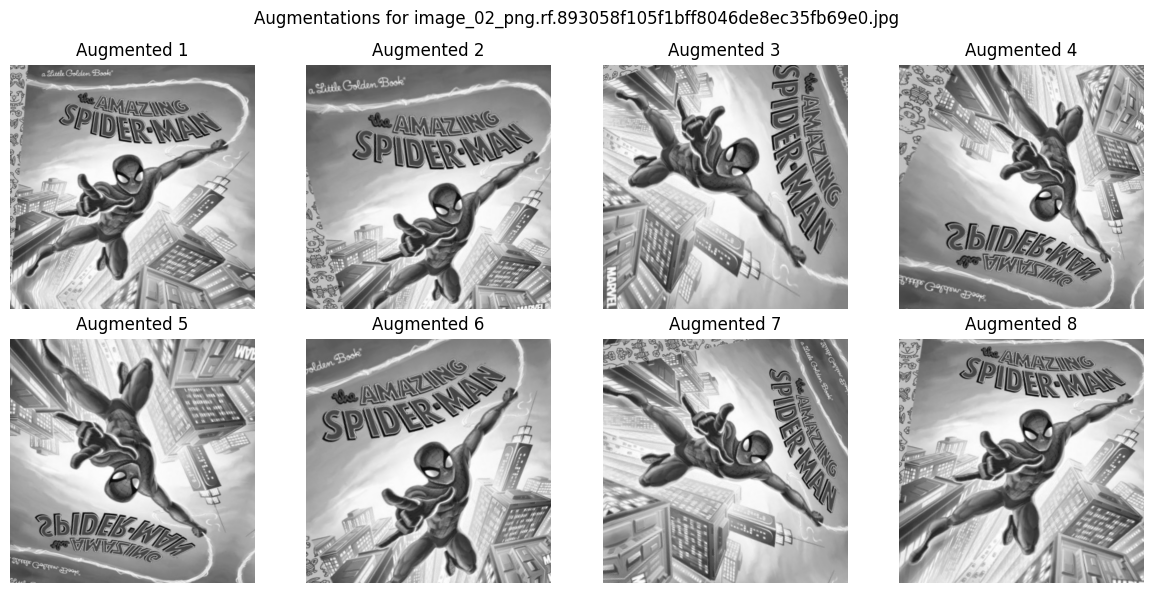

Augmenting image_18_png.rf.107a9e75ce7586cb8bba37a1c941ce7e.jpg...


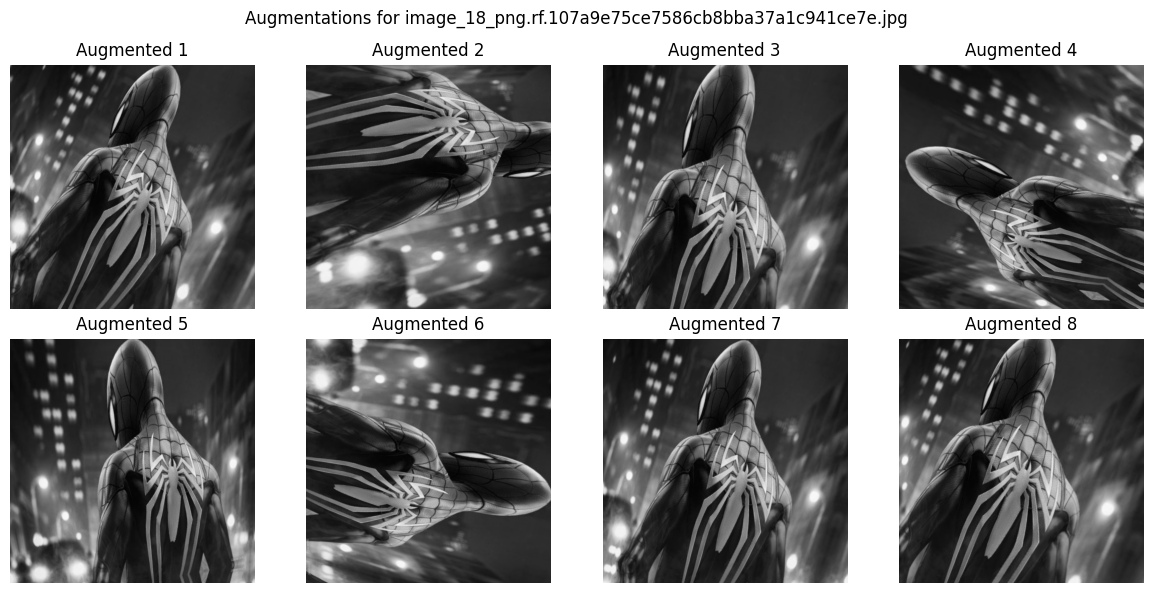

Augmenting image_19_png.rf.cee551e1d8a99738686cfe83fe447cbb.jpg...


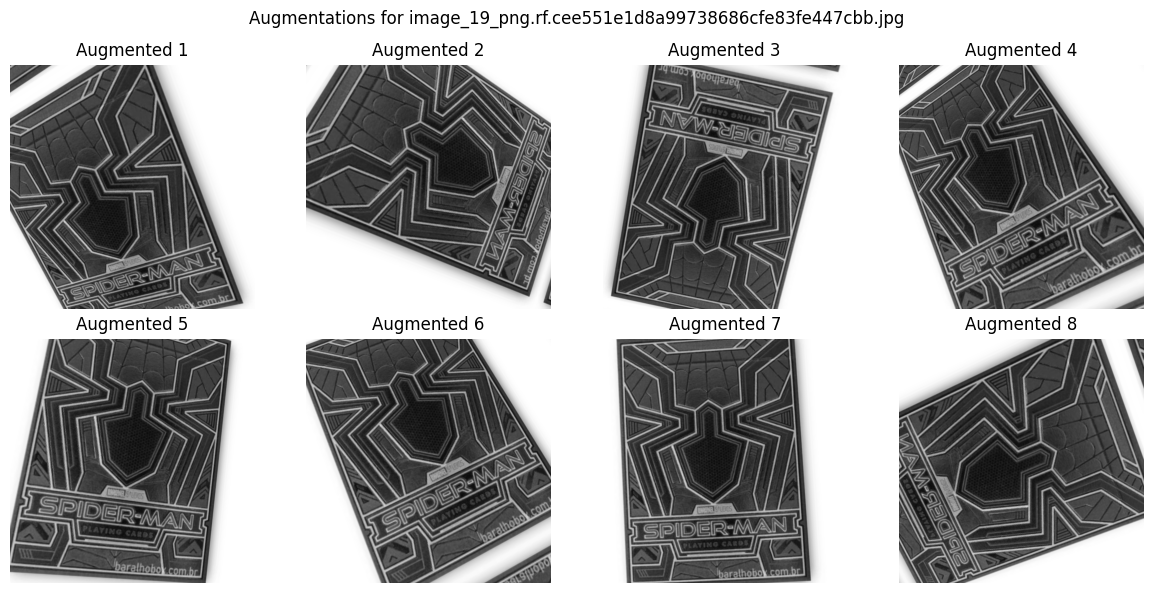

Augmenting image_14_png.rf.8393bf5ddf9a72e6153031a77ce14e5f.jpg...


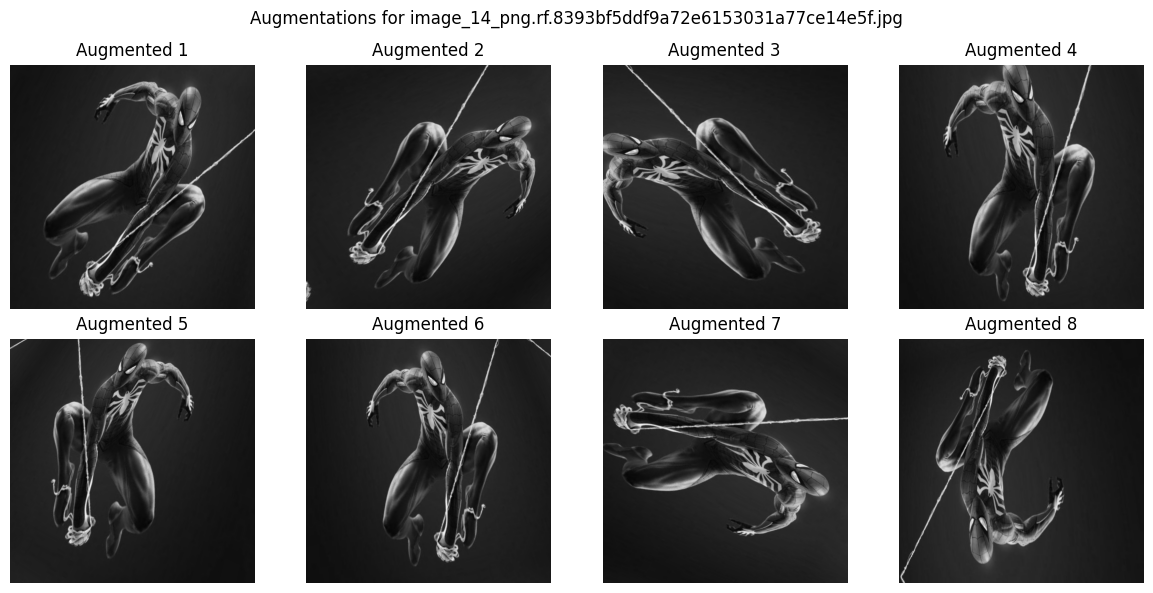

Augmenting image_17_png.rf.27ff9164f67e941970388e14a258f6eb.jpg...


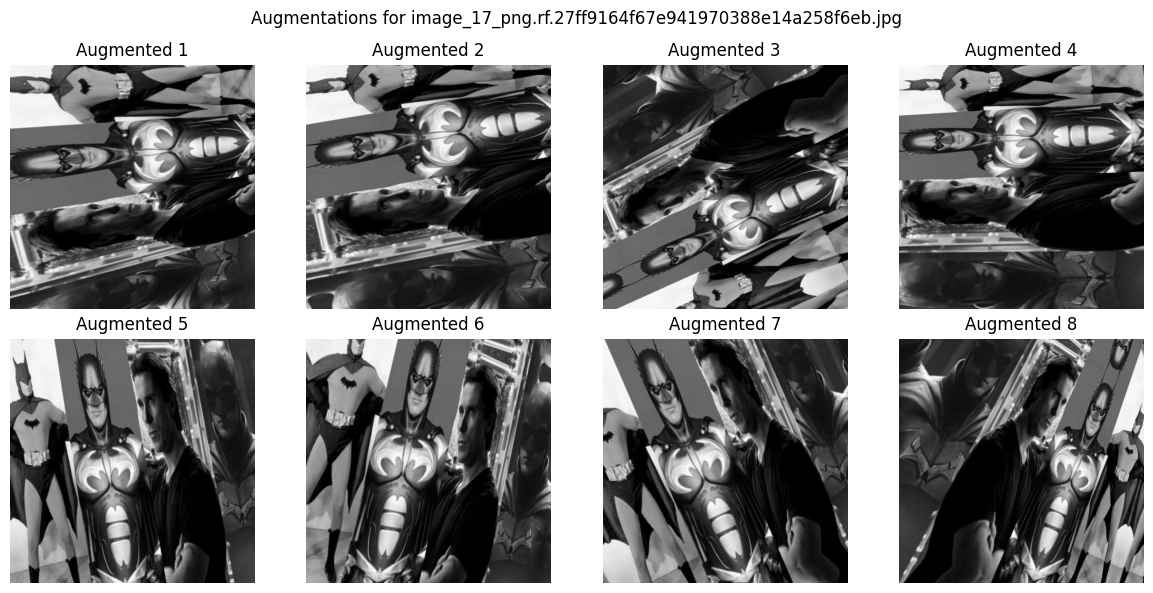

Augmenting image_06_png.rf.96b21a5338b6654a7b02e5151ddbd6d9.jpg...


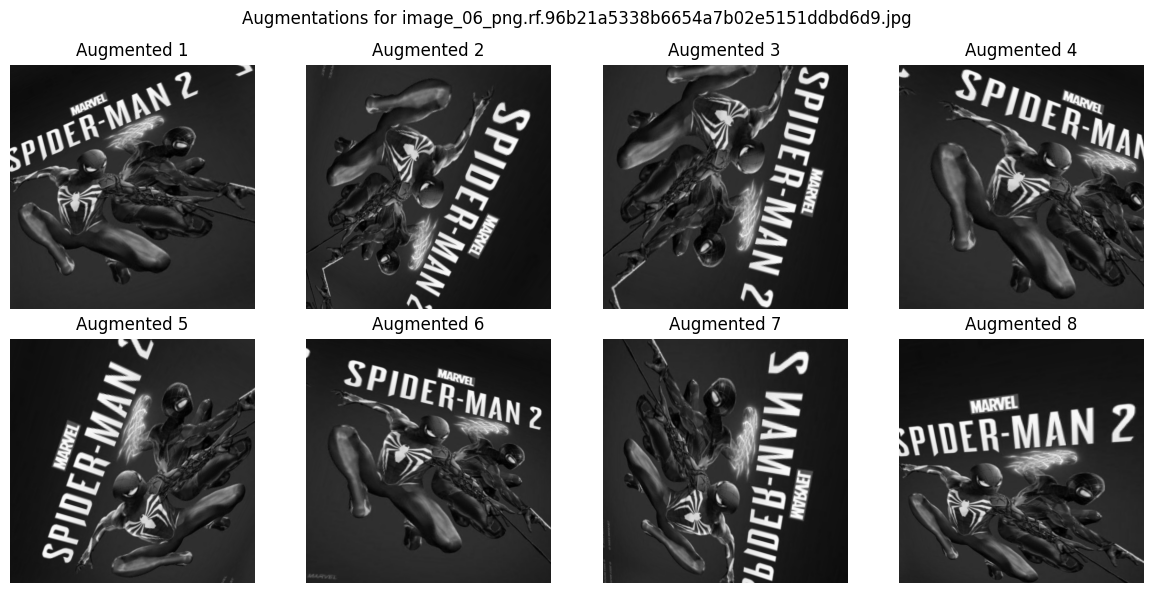

Augmenting image_20_png.rf.2643c61c8b62aee0c236be6c18346126.jpg...


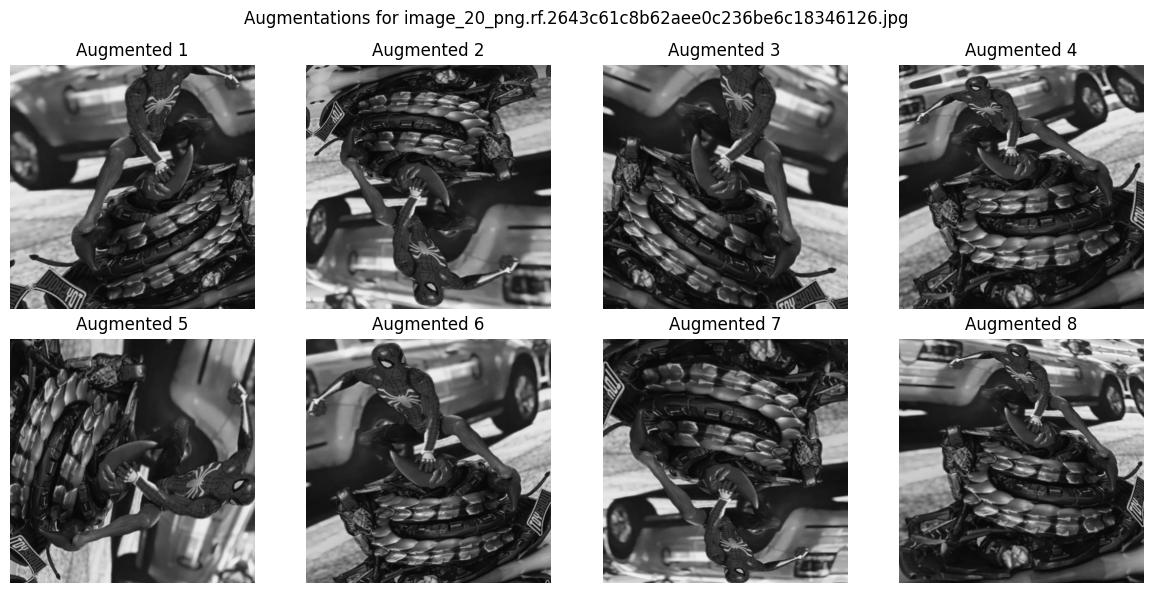

Augmenting image_10_png.rf.9f39beeb625ebc1cb8fc2d1af22433e6.jpg...


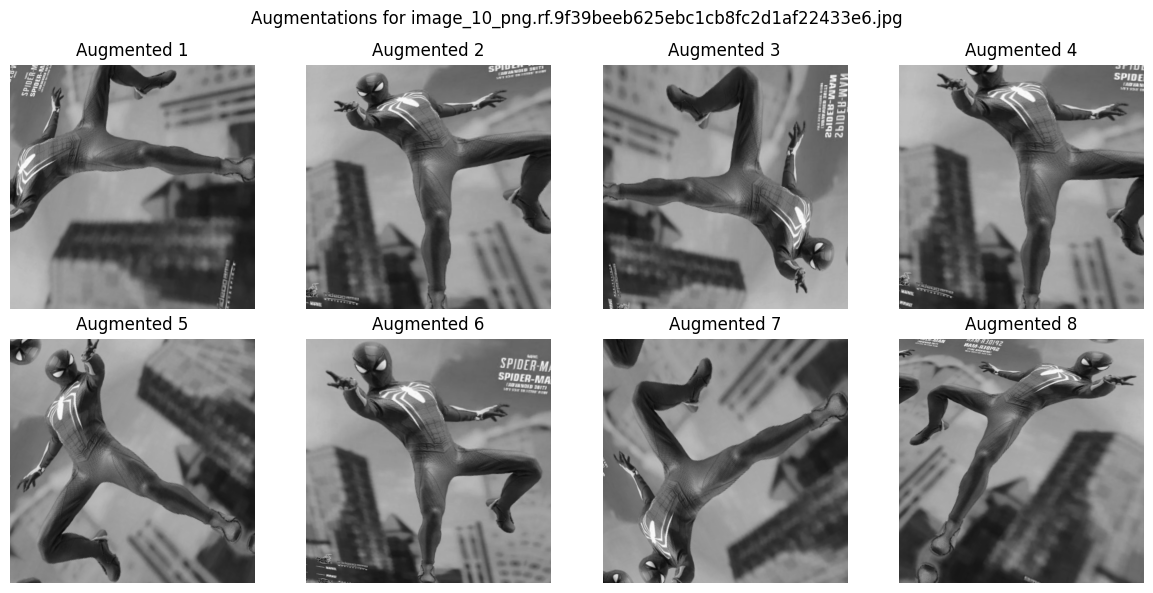

In [ ]:
# Install fastai if not already
!pip install -q fastai

# Imports
from fastai.vision.all import *
import matplotlib.pyplot as plt
from pathlib import Path
import os

# Assuming the images are in the '/content/sam' directory
img_dir = Path("/content/sam")

# Define augmentation pipeline
aug_pipeline = aug_transforms(
    size=None, # Let fastai determine size
    do_flip=True,
    flip_vert=True,
    max_rotate=30,
    max_zoom=1.2,
    max_lighting=0.5,
    max_warp=0.2,
    p_affine=1.0,
    p_lighting=1.0
)

# Wrap in Pipeline
tfms = Pipeline(aug_pipeline)

# Get list of image files in the directory
image_files = [f for f in os.listdir(img_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Process each image in the directory
for img_file in image_files:
    img_path = img_dir/img_file
    img = PILImage.create(img_path)
    img_tensor = ToTensor()(img).float() / 255.  # Convert to float in range [0,1]

    # Add batch dimension
    img_tensor = img_tensor.unsqueeze(0)  # Shape: [1, 3, H, W]

    # Plot 8 augmentations for each image
    print(f"Augmenting {img_file}...")
    fig, axs = plt.subplots(2, 4, figsize=(12, 6))
    fig.suptitle(f"Augmentations for {img_file}")
    for i, ax in enumerate(axs.flatten()):
        aug_img_tensor = tfms(img_tensor.clone())[0]  # Remove batch dim
        show_image(aug_img_tensor, ax=ax, title=f"Augmented {i+1}")
    plt.tight_layout()
    plt.show()